# Energy Density vs Total Energy

Import important libraries and methods including Axes3D, which you will use for 3D plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

plt.style.use('seaborn-colorblind')

## Set the spatial parameters
We define a space that runs from $a$ to $b$ in 2D. The grid size we have chosen is $s$. That is,, we will compute the electric field and thus the energy density at points at are spaced no closer than $s$ apart. This approximation of the space (i.e., the choice of mesh) is a common one we have to make in computational problems. Refined meshes can lead us to better results.

In [2]:
a = -10
b = -1*a
s = 0.1

x = np.arange(a,b+s,s)
y = np.arange(a,b+s,s)
z = np.arange(a,b+s,s)

X, Y = np.meshgrid(x,y)

## Place the charges
Here, we selected the charges to be just off-mesh to avoid infinities in our calculations.

In [3]:
x1 = np.round(-1*3*s-s/2,4)
y1 = s/2
x2 = np.round(3*s+s/2,4)
y2 = s/2

print('first charge at <',x1,',',y1,'>')
print('second charge at <',x2,',',y2,'>')

first charge at < -0.35 , 0.05 >
second charge at < 0.35 , 0.05 >


## Compute the net electric field at every point on the mesh
Using the pt. charge formula in 2D, we computed the net electric field at every point on the mesh at plotted the resulting field

In [4]:
epsilon = 8.85e-12
k = 1/(4*np.pi*epsilon)
q = 1e-9

E1x = k*q*(X-x1)/np.sqrt((X-x1)**2+(Y-y1)**2)**3
E1y = k*q*(Y-y1)/np.sqrt((X-x1)**2+(Y-y1)**2)**3

E2x = -k*q*(X-x2)/np.sqrt((X-x2)**2+(Y-y2)**2)**3
E2y = -k*q*(Y-y2)/np.sqrt((X-x2)**2+(Y-y2)**2)**3

Enetx = E1x + E2x
Enety = E1y + E2y

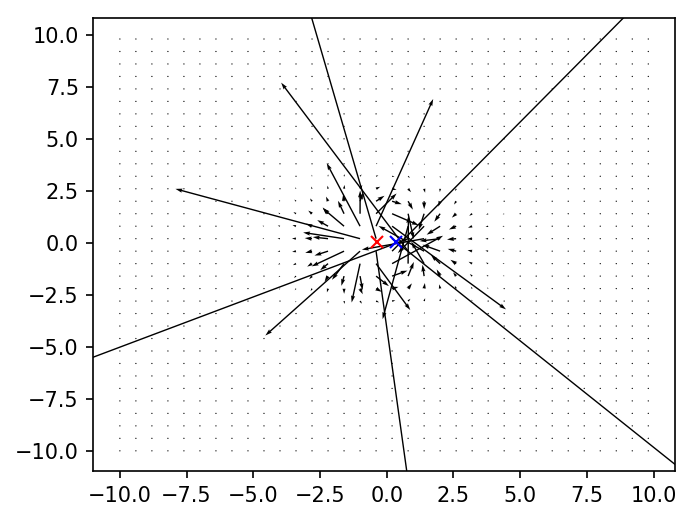

In [5]:
skip = 6 ## reduce number of points to visualize
fig = plt.figure(figsize=(5,4),dpi=150)
plt.quiver(X[::skip,::skip],Y[::skip,::skip],Enetx[::skip,::skip],Enety[::skip,::skip])
plt.plot(x1,y1,'rx')
plt.plot(x2,y2,'bx')

## Problems to solve
1. In this jupyter notebook, there are two point charges whose field we can see in 2D space. For this problem, we will limit our solution to the plane to reduce computational load. It looks like the dipole that we have seen before. The algorithm you will develop to determine the approximate total energy relies on the energy density: $u(\mathbf{r}) = \frac{\varepsilon_0}{2}E(\mathbf{r})^2$. Compute the energy density at each point in the space and plot the result in 3D (with the 3rd dimension representing the energy density at each point). Here, you might need to look into making [surface plots](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots) or [contour plots](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#contour-plots) in Python (your choice). Comment on any features of the energy density that you notice.
2. Now, pick a point between the two charges (maybe the midpoint), and plot the energy density at that point vs separation between charges. What do you notice a how the local energy density changes as the charges get closer together?
3. Add up the density at every point in space to find the estimated total energy $U \approx U_{est} = \sum u_i(\mathbf{r}_i)$.
4. Now, that you have tools to compute the energy density in 2D space from part 3, recompute it for different values of the separation between the charges, and plot the results ($U_{est}$ vs $r_{sep}$). What happens to the estimated total energy as the charges get closer together?
5. Given what you have learned from parts 4 and 6, what is the story regarding energy density and total energy as the charges move closer together?
6. BONUS - We have made a choice of mesh (number of grid points) and total space (how big the space is). How good were those choices? That is numerical solutions are always estimates. We seek convergence to some solution that is numerical in nature, so how good did we do?